# Project: Gold Price Prediction (with ARIMA)

### Introduction

Gold has always been a fascinating asset, valued for its stability and appeal in financial markets.
<br>Predicting gold prices is a challenging yet insightful task, given its susceptibility to economic changes, geopolitical events, and market dynamics.
<br>In this project, we utilize the ARIMA (AutoRegressive Integrated Moving Average) model, a widely used statistical approach for time series forecasting, to analyze historical gold prices and generate predictions.

#### About the Dataset

The dataset consists of daily gold price data collected from *Investing.com* website, spanning from 2010 to 2015. This time series data captures the fluctuations in gold prices over fifteen years, providing a solid foundation for applying ARIMA and evaluating its forecasting capabilities.

#### Our Goal

The primary objective of this project is to gain hands-on experience with the ARIMA model by applying it to real-world financial data. Through exploratory data analysis, model fitting, and prediction evaluation, we aim to understand the effectiveness of ARIMA in forecasting gold prices and refine our skills in time series analysis using Python.

### 1. Data Exploration

In [1]:
import pandas as pd
# data manipulation, analysis

import numpy as np
# numerical operations

import matplotlib.pyplot as plt
import seaborn as sns
# plotting and visualization

In [4]:
#!pip3 install pmdarima

In [2]:
import matplotlib.dates as mdates
import datetime
# managing dates and time

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
# ARIMA model libraries

import sklearn.metrics as metrics
# evaluating the performance

In [9]:
df = pd.read_csv(r"C:\Users\Majk\PROJECTS\Gold Price Prediction\XAU_EUR Historical Data_15y.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3913 non-null   object 
 1   Price     3913 non-null   object 
 2   Open      3913 non-null   object 
 3   High      3913 non-null   object 
 4   Low       3913 non-null   object 
 5   Vol.      0 non-null      float64
 6   Change %  3913 non-null   object 
dtypes: float64(1), object(6)
memory usage: 214.1+ KB


In [13]:
df.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        3913
Change %       0
dtype: int64

In [15]:
df.sample()

,Date,Price,Open,High,Low,Vol.,Change %
1138,11/18/2020,"1,578.92","1,584.73","1,588.23","1,571.03",NaN,-0.32%


### 2. Data Cleaning

#### Columns overview
**Date** - we have a daily based dataset, where the entries are stated according to working days
<br>**Price** - information about the latest price on the given day
<br>**Open** - the opening price, the first traded price of the day
<br>**High, Low** - the highest and the lowest traded price on the given day
<br>**Change %** - percentage change of the day-to-day price

In [19]:
df2 = df

In [21]:
df_date = pd.to_datetime(df2['Date'], format='%m/%d/%Y')
# Changing the Date column to datetime format

In [23]:
df2 = df2.drop('Date', axis=1)
df2.insert(0, 'Date', df_date, allow_duplicates=False)

In [25]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2025-03-31,"2,887.32","2,850.93","2,894.98","2,837.47",NaN,1.36%
1,2025-03-28,"2,848.68","2,828.28","2,861.54","2,826.75",NaN,0.68%
2,2025-03-27,"2,829.57","2,807.79","2,836.79","2,805.79",NaN,0.79%
3,2025-03-26,"2,807.30","2,798.57","2,810.87","2,790.99",NaN,0.36%
4,2025-03-25,"2,797.16","2,787.18","2,808.99","2,785.22",NaN,0.37%


In [27]:
df2.sort_values(by='Date', inplace=True)
# Changing the order of the data for better visualization and manipulation 

In [29]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %
3912,2010-04-01,828.49,823.56,834.69,822.03,NaN,0.61%
3911,2010-04-02,829.26,828.49,831.61,825.03,NaN,0.09%
3910,2010-04-05,837.68,833.27,840.18,829.79,NaN,1.02%
3909,2010-04-06,846.04,837.81,851.43,837.48,NaN,1.00%
3908,2010-04-07,859.94,845.80,863.66,845.50,NaN,1.64%


In [31]:
df2.describe(include='all')

,Date,Price,Open,High,Low,Vol.,Change %
count,3913,3913,3913,3913,3913,0.0,3913
unique,NaN,3826,3808,3810,3802,NaN,502
top,NaN,"1,066.04",963.70,"1,067.72","1,083.43",NaN,-0.21%
freq,NaN,3,3,3,4,NaN,32
mean,2017-09-29 19:11:51.167901952,NaN,NaN,NaN,NaN,NaN,NaN
min,2010-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017-09-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,2025-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3913 entries, 3912 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3913 non-null   datetime64[ns]
 1   Price     3913 non-null   object        
 2   Open      3913 non-null   object        
 3   High      3913 non-null   object        
 4   Low       3913 non-null   object        
 5   Vol.      0 non-null      float64       
 6   Change %  3913 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 244.6+ KB


In [35]:
df3 = df2.set_index('Date')
# Setting the *Date* column as an index

df3

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-04-01,828.49,823.56,834.69,822.03,NaN,0.61%
2010-04-02,829.26,828.49,831.61,825.03,NaN,0.09%
2010-04-05,837.68,833.27,840.18,829.79,NaN,1.02%
2010-04-06,846.04,837.81,851.43,837.48,NaN,1.00%
2010-04-07,859.94,845.80,863.66,845.50,NaN,1.64%
...,...,...,...,...,...,...
2025-03-25,"2,797.16","2,787.18","2,808.99","2,785.22",NaN,0.37%
2025-03-26,"2,807.30","2,798.57","2,810.87","2,790.99",NaN,0.36%
2025-03-27,"2,829.57","2,807.79","2,836.79","2,805.79",NaN,0.79%


In [37]:
df3.drop(["Open", "High", "Low","Vol.","Change %"], axis=1, inplace=True)
# Dropping all the columns that we won't use.

df3

,Price
Date,
2010-04-01,828.49
2010-04-02,829.26
2010-04-05,837.68
2010-04-06,846.04
2010-04-07,859.94
...,...
2025-03-25,"2,797.16"
2025-03-26,"2,807.30"
2025-03-27,"2,829.57"


In [39]:
df3["Price"] = df3["Price"].str.replace(",", "")
df3["Price"] = df3["Price"].astype(float)
# Adjusting the format of the numbers in Price column, so we can change the string type to float

### 3. Visualization of the Original Data

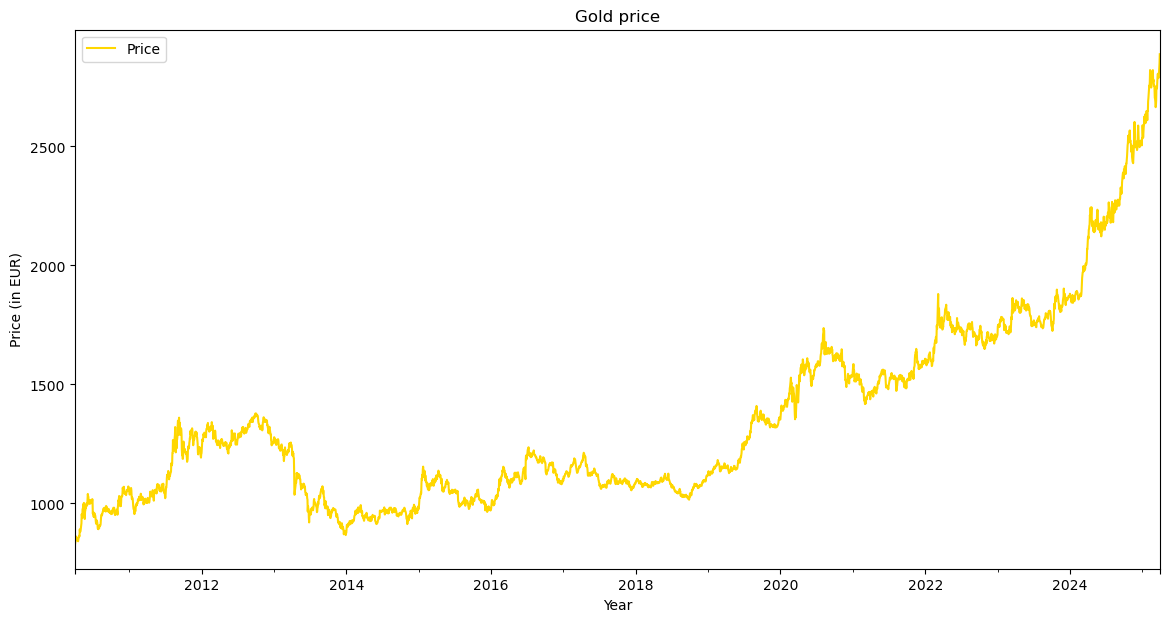

In [42]:
df3['Price'].plot(figsize=(14,7), color='gold')

plt.title('Gold price')
plt.xlabel('Year')
plt.ylabel('Price (in EUR)')
plt.legend(loc='upper left')
plt.show()

##### Adding a 90-days Moving Average

Moving average is calculated to identify the trend direction or to determine its support and resistance levels. It is a trend-following or lagging indicator because it is based on past prices.
<br>I incorporated a 90-day moving average to illustrate how smoothing techniques can help identify underlying trends in gold price movements. While it’s useful in reducing short-term volatility, for this analysis, I opted to focus on ARIMA, which accounts for temporal dependencies more directly. The moving average serves as an additional exploratory tool rather than a primary forecasting component.

In [48]:
df3.loc[:, ("MA_90days")] = df3["Price"].rolling(window=90).mean()

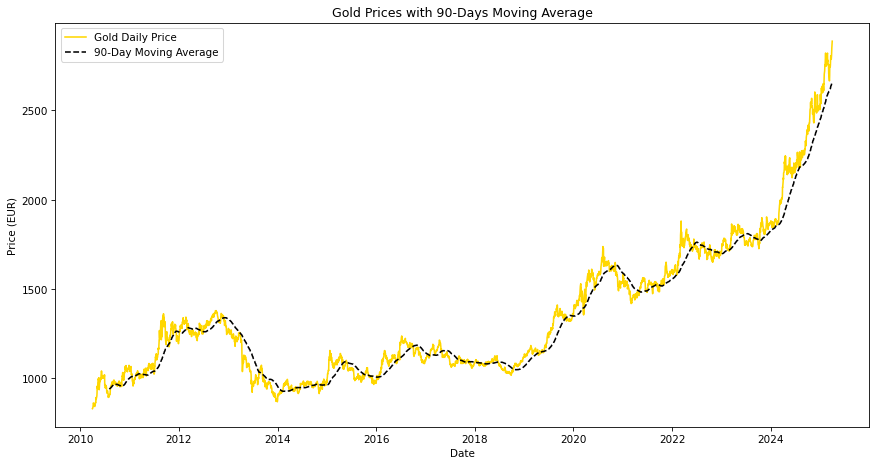

In [50]:
plt.rcParams.update({'figure.figsize':(14,7),'figure.dpi':75})

plt.plot(df3["Price"],
        label="Gold Daily Price",
        color="gold")
plt.plot(df3["MA_90days"],
        label="90-Day Moving Average",
        linestyle="--",
        color="black")

plt.title("Gold Prices with 90-Days Moving Average")
plt.xlabel("Date")
plt.ylabel("Price (EUR)")
plt.legend()

plt.show()

##### Seasonal Decomposition
We use this statistical technique for breaking down our time series into its essential components, including the trend, seasonal pattern, and residual (or error) components. The goal is to separate the different sources of variation within the data to understand it better.

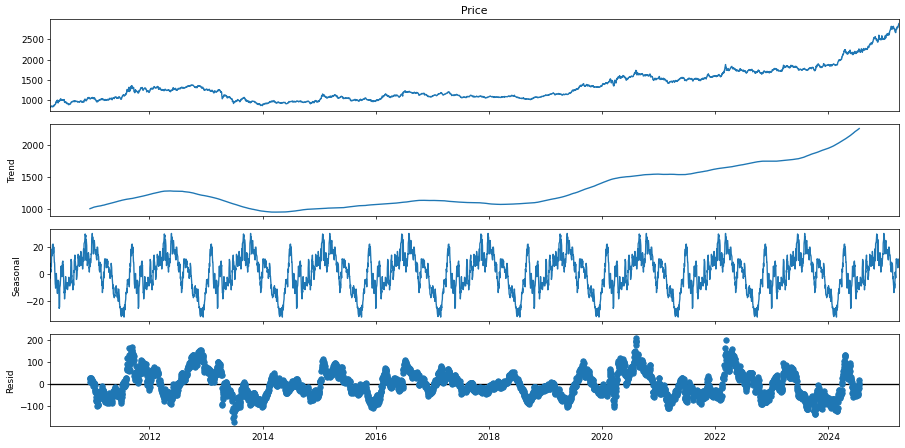

In [53]:
plt.rcParams.update({'figure.figsize':(14,7),'figure.dpi':65})

result = seasonal_decompose(df3.Price, model='additive', period=365)

result.plot()
plt.show()

### 4. FORCASTIG with ARIMA Model

The Autoregressive Integrated Moving Average (ARIMA) model is used to predict a given time series based on its own past values.
<br>It is used for nonseasonal series of numbers that exhibits patterns and is not a series of random events.

#### Checking for Stationarity

We will use Augmented Dickey-Fuller test to check fot stationarity. For an ARIMA model to really work, the data has to be stationary.

In [59]:
adftest = adfuller(df3["Price"].dropna())

print(f"ADF statistic: {adftest[0]: .5f}")
print(f"P-value of the ADF test: {adftest[1]: .5f}")
if adftest[1] < 0.05:
    print("Interpretation: The original series is Stationary.\n")
else:
    print("Interpretation: The original series is Non-Stationary.\n")

ADF statistic:  2.53139
P-value of the ADF test:  0.99906
Interpretation: The original series is Non-Stationary.



The result of our Augmented Dickey-Fuller test indicate that our original series is Non-stationary. We will perform differencing until out series is stationary.
<br>Differencing is a method, where each observation is substracted from the previous one to give us a new time series of differences.

In [62]:
adftest_diff = adfuller(df3["Price"].diff().dropna())

print(f"ADF statistic (Differenced): {adftest_diff[0]: .5f}")
print(f"P-value of the ADF test: {adftest_diff[1]: .5f}")
if adftest_diff[1] < 0.05:
    print("Interpretation: The differenced series is Stationary.\n")
else:
    print("Interpretation: The differenced series is Non-Stationary.\n")

ADF statistic (Differenced): -46.35109
P-value of the ADF test:  0.00000
Interpretation: The differenced series is Stationary.



#### Identifiying ARIMA *p*, *d* and *q* parameters with ACF and PACF

To determine the values of *p* and *q*, we can use ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function). 
<br>We can find the value of *d* by creating a situation where, after differencing, the data resembles white noise.

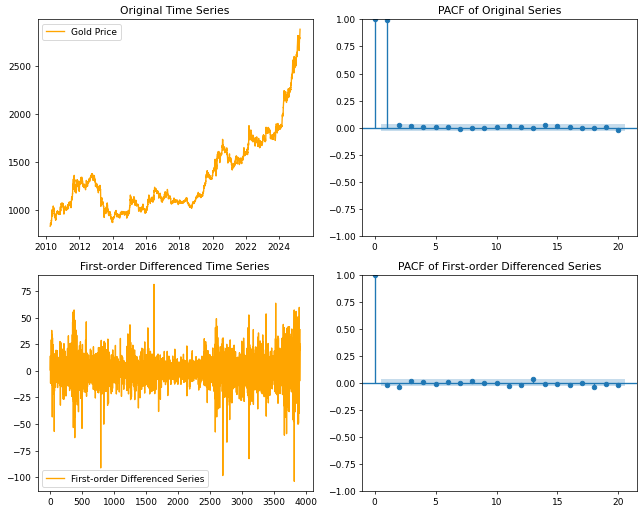

In [66]:
# Original time series
time_series = df3.Price

# First-order differencing
diff_series = np.diff(time_series, n=1)

# Setting up plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

ax1.plot(time_series, label='Gold Price', color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

plot_pacf(time_series, ax=ax2, lags=20)
ax2.set_title('PACF of Original Series')

ax3.plot(diff_series, label='First-order Differenced Series', color='orange')
ax3.set_title('First-order Differenced Time Series')
ax3.legend()

plot_pacf(diff_series, ax=ax4, lags=20)
ax4.set_title('PACF of First-order Differenced Series')

plt.tight_layout()
plt.show()

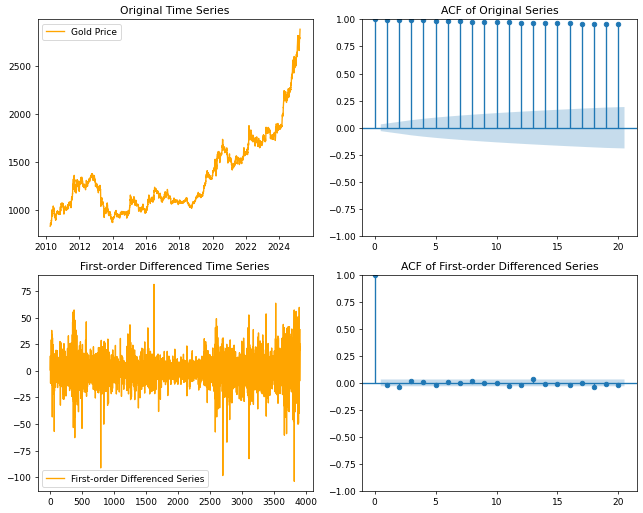

In [68]:
# Original time series
time_series = df3.Price

# First-order differencing
diff_series = np.diff(time_series, n=1)

# Setting up plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8))

ax1.plot(time_series, label='Gold Price', color='orange')
ax1.set_title('Original Time Series')
ax1.legend()

plot_acf(time_series, ax=ax2, lags=20)
ax2.set_title('ACF of Original Series')

ax3.plot(diff_series, label='First-order Differenced Series', color='orange')
ax3.set_title('First-order Differenced Time Series')
ax3.legend()

plot_acf(diff_series, ax=ax4, lags=20)
ax4.set_title('ACF of First-order Differenced Series')

plt.tight_layout()
plt.show()

#### Splitting the Data (train/test split)

Using ARIMA model, we must firstly make a fitted model to predict future values based on the data. Once predictions are made, we can visualize them by plotting the predicted values alongside the actual values. We can do this by using the machine learning approach with a train/test split.

In [72]:
num_split = int(len(df3) * 0.8)
# Splitting the data

train_set = df3['Price'].iloc[:num_split]
test_set = df3['Price'].iloc[num_split:]

#### Identifiying ARIMA *p*, *d* and *q* parameters with *auto_arima()* function

For the same task we can also use *pmdarima* library with the *auto_arima()* function. 
<br>This function assists in determining the ARIMA model’s optimum parameters and provides a fitted ARIMA model as a result.
<br>Doing this step-by-step, we would need to check out the AIC and BIC statistics for each model. Lower values imply that the model fits better.

In [76]:
model = pm.auto_arima(
                    train_set,
                    start_p=0,
                    start_q=0,
                    test='adf',
                    start_order=0,
                    max_p=10,
                    max_q=10,
                    max_order=10,
                    seasonal=False,
                    trace=True,
                    stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24261.523, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=24263.114, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=24262.371, Time=0.68 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=24264.359, Time=0.98 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=24266.302, Time=1.01 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=24266.965, Time=1.14 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=24268.143, Time=1.42 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=24269.503, Time=1.88 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=24267.833, Time=2.09 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=24269.393, Time=3.34 sec
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=24271.201, Time=3.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=24263.138, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=24262.879, Time=2.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=24264.363, Time=1.61 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=24265.311, Time=2.6

In [78]:
best_order = model.order

best_model = model.arima_res_
best_model_summary = best_model.summary()

print('Best order:', best_order)
print('Best model summary:\n', best_model_summary)

Best order: (2, 1, 2)
Best model summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3130
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -12123.721
Date:                Tue, 29 Apr 2025   AIC                          24259.442
Time:                        18:41:08   BIC                          24295.733
Sample:                    04-01-2010   HQIC                         24272.468
                         - 03-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4172      0.303      1.376      0.169      -0.177       1.012
ar.L1          0.5186      0.021     24.368      0.000       0.477       0.560
ar.L2    

#### Visualizing the Time Series

In [97]:
train_set = train_set.asfreq(pd.infer_freq(train_set.index))
# Infer the frequency to proces the data

In [99]:
model = ARIMA(train_set, order=best_order)
model_fit = model.fit()
# Fitting the ARIMA model

forecast = model_fit.forecast(steps=len(test_set))
# Forecasting

In [101]:
train_set

Date
2010-04-01     828.49
2010-04-02     829.26
2010-04-05     837.68
2010-04-06     846.04
2010-04-07     859.94
               ...   
2022-03-24    1779.61
2022-03-25    1782.24
2022-03-28    1750.04
2022-03-29    1730.44
2022-03-30    1731.20
Freq: B, Name: Price, Length: 3130, dtype: float64

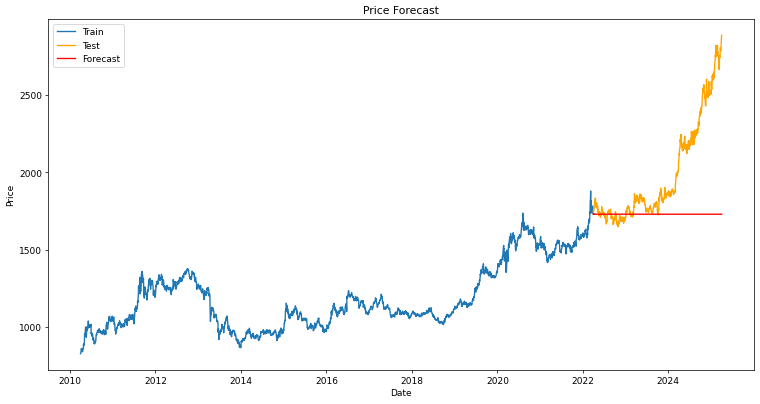

In [103]:
plt.figure(figsize=(14,7))

plt.plot(train_set.index, train_set, label='Train')
plt.plot(test_set.index, test_set, label='Test', color='orange')
plt.plot(test_set.index, forecast, label='Forecast', color='red')

plt.title('Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#### Evaluating Results

We can also evaluate the accuracy of the forecast (model fit) with multiple measures: <br>*mean absolute percentage error* (MAPE), *mean absolute error* (MAE), *mean squared error* (MSE), *root mean squared error* (RMSE) and *Coefficient of Determination* (R2).

In [107]:
mape = metrics.mean_absolute_percentage_error(test_set, forecast)
mae = metrics.mean_absolute_error(test_set, forecast)
mse = metrics.mean_squared_error(test_set, forecast)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(test_set, forecast)

print("Results of sklearn.metrics: \n")
print(f"MAPE: {mape:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2: .4f}", "\n")

Results of sklearn.metrics: 

MAPE: 0.1162
MAE: 270.4792
MSE: 174215.4293
RMSE: 417.3912
R2: -0.6381 



### 5. Conclusion

The result of our model, as shown with the visualization above, fits the data really poorly. This fact is comfirmed with the followed measures, e.g. *RMSE value* of 417.3912 indicates that our forcasted value is off for €417.39 on average and *R-squared value* is actually negative, meaning that the model does not predict the outcome.

Since gold is closely linked with economic and political conditions, price is not determined just by its own historical trends.
<br>Therefore, as seen in this analysis, gold price is very hard to predict using traditional time series method.